In [1]:
# Standards Librairies import
import os
from time import time
import warnings
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score

# Clustering Librairies import
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift, estimate_bandwidth
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from sklearn.manifold import TSNE


mpl.rcParams["figure.figsize"] = (12, 8)
init_notebook_mode()
warnings.filterwarnings('ignore')

In [2]:

data = pd.read_csv("cleanedolist-customers-segmentation.csv",
                   index_col=0)
data


index                customer_unique_id  nb_orders  total_spend  \
0          0  0000366f3b9a7992bf8c76cfdf3221e2          1       141.90   
1          1  0000b849f77a49e4a4ce2b2a4ca5be3f          1        27.19   
2          2  0000f46a3911fa3c0805444483337064          1        86.22   
3          3  0000f6ccb0745a6a4b88665a16c9f078          1        43.62   
4          4  0004aac84e0df4da2b147fca70cf8255          1       196.89   
...      ...                               ...        ...          ...   
93353  93353  fffcf5a5ff07b0908bd4e2dbc735a684          1      2067.42   
93354  93354  fffea47cd6d3cc0a88bd621562a9d061          1        84.58   
93355  93355  ffff371b4d645b6ecea244b27531430a          1       112.46   
93356  93356  ffff5962728ec6157033ef9805bacc48          1       133.69   
93357  93357  ffffd2657e2aad2907e67c3e9daecbeb          1        71.56   

       mean_payment_sequential  mean_payment_installments  mean_review_score  \
0                          1.0                        8.0                5.0   
1                          1.0                        1.0                4.0   
2                          1.0                        8.0                3.0   
3                          1.0                        4.0                4.0   
4                          1.0                        6.0                5.0   
...                        ...                        ...                ...   
93353                      1.0                       10.0                5.0   
93354                      1.0                        1.0                4.0   
93355                      1.0                        1.0                5.0   
93356                      1.0                        5.0                5.0   
93357                      1.0                        4.0                5.0   

       mean_delivery_days  favorite_sale_month  books_cds_media  ...  \
0                     6.0                    5              0.0  ...   
1                     3.0                    5              0.0  ...   
2                    26.0                    3              0.0  ...   
3                    20.0                   10              0.0  ...   
4                    13.0                   11              0.0  ...   
...                   ...                  ...              ...  ...   
93353                28.0                    6              0.0  ...   
93354                30.0                   12              0.0  ...   
93355                15.0                    2              0.0  ...   
93356                12.0                    5              0.0  ...   
93357                 8.0                    5              0.0  ...   

       technology  toys_baby  total_items  mean_nb_items  order_mean_delay  \
0             0.0        0.0          1.0            1.0             111.0   
1             0.0        0.0          1.0            1.0             114.0   
2             0.0        0.0          1.0            1.0             537.0   
3             1.0        0.0          1.0            1.0             321.0   
4             1.0        0.0          1.0            1.0             288.0   
...           ...        ...          ...            ...               ...   
93353         0.0        0.0          2.0            2.0             447.0   
93354         0.0        1.0          1.0            1.0             262.0   
93355         0.0        0.0          1.0            1.0             568.0   
93356         0.0        0.0          1.0            1.0             119.0   
93357         0.0        0.0          1.0            1.0             484.0   

       freight_ratio  mean_price_order  customer_zip_code_prefix  \
0               0.08            129.90                      7787   
1               0.30             18.90                      6053   
2               0.20             69.00                     88115   
3               0.40             25.99                     66812   
4              

In [3]:
data.columns


Index(['index', 'customer_unique_id', 'nb_orders', 'total_spend',
       'mean_payment_sequential', 'mean_payment_installments',
       'mean_review_score', 'mean_delivery_days', 'favorite_sale_month',
       'books_cds_media', 'fashion_clothing_accessories', 'flowers_gifts',
       'groceries_food_drink', 'health_beauty', 'home_furniture', 'other',
       'sport', 'technology', 'toys_baby', 'total_items', 'mean_nb_items',
       'order_mean_delay', 'freight_ratio', 'mean_price_order',
       'customer_zip_code_prefix', 'customer_city', 'customer_state'],
      dtype='object')

In [4]:
data.drop(["customer_zip_code_prefix",
           "customer_city",
           "customer_state",
           "mean_price_order",
           "mean_nb_items","index"], axis=1, inplace=True)

In [5]:
categorical_features = list(data.select_dtypes(exclude=['int64', 'float64', 'uint8']).columns)
categorical_features

['customer_unique_id']

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93358 entries, 0 to 93357
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_unique_id            93358 non-null  object 
 1   nb_orders                     93358 non-null  int64  
 2   total_spend                   93358 non-null  float64
 3   mean_payment_sequential       93358 non-null  float64
 4   mean_payment_installments     93358 non-null  float64
 5   mean_review_score             93358 non-null  float64
 6   mean_delivery_days            93358 non-null  float64
 7   favorite_sale_month           93358 non-null  int64  
 8   books_cds_media               93358 non-null  float64
 9   fashion_clothing_accessories  93358 non-null  float64
 10  flowers_gifts                 93358 non-null  float64
 11  groceries_food_drink          93358 non-null  float64
 12  health_beauty                 93358 non-null  float64
 13  h

In [7]:
df = data.drop(['customer_unique_id'], axis = 1)

In [8]:
categories_col = ['books_cds_media',
                  'fashion_clothing_accessories',
                  'flowers_gifts',
                  'groceries_food_drink',
                  'health_beauty',
                  'home_furniture',
                  'other',
                  'sport',
                  'technology',
                  'toys_baby']
df = df.drop(categories_col, axis=1)
df.head(3)

nb_orders  total_spend  mean_payment_sequential  mean_payment_installments  \
0          1       141.90                      1.0                        8.0   
1          1        27.19                      1.0                        1.0   
2          1        86.22                      1.0                        8.0   

   mean_review_score  mean_delivery_days  favorite_sale_month  total_items  \
0                5.0                 6.0                    5          1.0   
1                4.0                 3.0                    5          1.0   
2                3.0                26.0                    3          1.0   

   order_mean_delay  freight_ratio  
0             111.0           0.08  
1             114.0           0.30  
2             537.0           0.20

In [9]:
numerical_features = list(df.select_dtypes(include=['int64','float64', 'uint8']).columns)
numerical_features

['nb_orders',
 'total_spend',
 'mean_payment_sequential',
 'mean_payment_installments',
 'mean_review_score',
 'mean_delivery_days',
 'favorite_sale_month',
 'total_items',
 'order_mean_delay',
 'freight_ratio']

In [10]:
scaler = MinMaxScaler()

preprocessor = ColumnTransformer([
    ('scaler', scaler, numerical_features)])



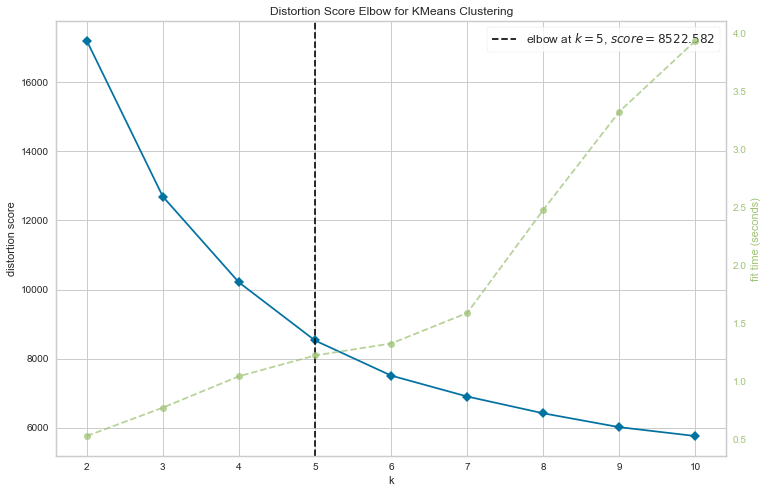

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
X = df.copy()

# Elbow method
kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("kelbowvisualizer", KElbowVisualizer(KMeans(),K=(4,12)))])
kmeans_visualizer.fit(X)
kmeans_visualizer.named_steps['kelbowvisualizer'].show()


In [12]:
pd.set_option('display.max_columns', None)


In [13]:
X.describe()

nb_orders   total_spend  mean_payment_sequential  \
count  93358.000000  93358.000000             93358.000000   
mean       1.033420    165.168210                 1.043872   
std        0.209097    226.292101                 0.364435   
min        1.000000      9.590000                 1.000000   
25%        1.000000     63.010000                 1.000000   
50%        1.000000    107.780000                 1.000000   
75%        1.000000    182.510000                 1.000000   
max       15.000000  13664.080000                26.000000   

       mean_payment_installments  mean_review_score  mean_delivery_days  \
count               93358.000000       93358.000000        93358.000000   
mean                    2.965951           4.158806           12.524327   
std                     2.717719           1.278290            9.550578   
min                     0.000000           1.000000            1.000000   
25%                     1.000000           4.000000            7.000000   
50%                     2.000000           5.000000           10.000000   
75%                     4.000000           5.000000           16.000000   
max                    26.000000           5.000000          210.000000   

       favorite_sale_month   total_items  order_mean_delay  freight_ratio  
count         93358.000000  93358.000000      93358.000000   93358.000000  
mean              6.034759      1.180370        232.502018       0.208141  
std               3.226430      0.620857        154.187659       0.124892  
min               1.000000      1.000000          0.000000       0.000000  
25%               3.000000      1.000000        108.000000       0.120000  
50%               6.000000      1.000000        212.000000       0.180000  
75%               8.000000      1.000000        342.000000       0.270000  
max              12.000000     24.000000        713.000000       0.960000

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93358 entries, 0 to 93357
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   nb_orders                  93358 non-null  int64  
 1   total_spend                93358 non-null  float64
 2   mean_payment_sequential    93358 non-null  float64
 3   mean_payment_installments  93358 non-null  float64
 4   mean_review_score          93358 non-null  float64
 5   mean_delivery_days         93358 non-null  float64
 6   favorite_sale_month        93358 non-null  int64  
 7   total_items                93358 non-null  float64
 8   order_mean_delay           93358 non-null  float64
 9   freight_ratio              93358 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 7.8 MB


In [15]:
# Best K in Elbow
K = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_



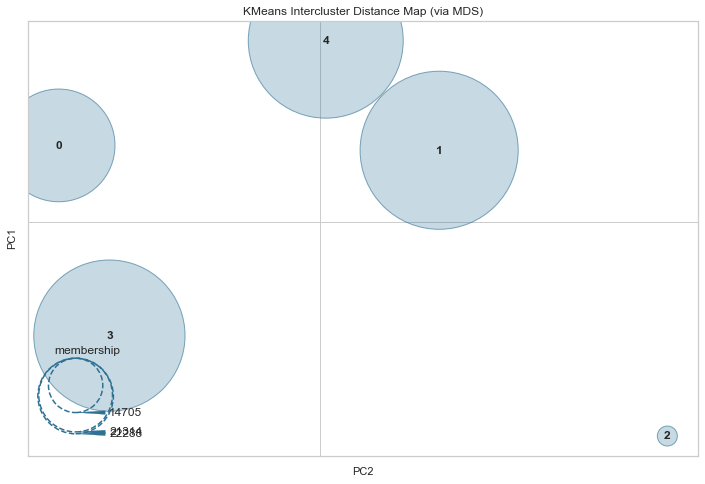

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [16]:
# Intercluster distance Map with best k
distance_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("distancevisualizer", InterclusterDistance(KMeans(K)))])
distance_visualizer.fit(X)
distance_visualizer.named_steps['distancevisualizer'].show()

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93358 entries, 0 to 93357
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   nb_orders                  93358 non-null  int64  
 1   total_spend                93358 non-null  float64
 2   mean_payment_sequential    93358 non-null  float64
 3   mean_payment_installments  93358 non-null  float64
 4   mean_review_score          93358 non-null  float64
 5   mean_delivery_days         93358 non-null  float64
 6   favorite_sale_month        93358 non-null  int64  
 7   total_items                93358 non-null  float64
 8   order_mean_delay           93358 non-null  float64
 9   freight_ratio              93358 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 7.8 MB


In [18]:
# KMeans Pipeline with best K
kmeans_model = Pipeline([("preprocessor", preprocessor),
                         ("kmeans", KMeans(K))])
kmeans_model.fit(X)

# Kmeans labels
kmeans_labels = kmeans_model.named_steps['kmeans'].labels_
data["kmeans_label"] = kmeans_labels

In [19]:
kmeans_clusters_means = data.groupby("kmeans_label").mean().reset_index()
kmeans_clusters_means

kmeans_label  nb_orders  total_spend  mean_payment_sequential  \
0             0   1.037599   156.846984                 1.039830   
1             1   1.000136   157.591514                 1.059436   
2             2   1.026945   192.988484                 1.047119   
3             3   1.016140   158.406674                 1.043241   
4             4   1.069730   169.940620                 1.036798   

   mean_payment_installments  mean_review_score  mean_delivery_days  \
0                   2.724696           4.552001           12.743216   
1                   3.189085           4.573070           11.807412   
2                   3.223038           1.251468           20.187205   
3                   3.031435           4.575388           12.317213   
4                   2.864422           4.624534            9.032364   

   favorite_sale_month  books_cds_media  fashion_clothing_accessories  \
0             2.498250         0.009658                      0.029886   
1             4.755525         0.007922                      0.049983   
2             5.807595         0.005389                      0.027370   
3            10.211973         0.007835                      0.039555   
4             6.522244         0.012316                      0.026434   

   flowers_gifts  groceries_food_drink  health_beauty  home_furniture  \
0       0.088747              0.011448       0.115967        0.279193   
1       0.091874              0.004318       0.113181        0.324034   
2       0.092161              0.006596       0.108217        0.332643   
3       0.107068              0.007882       0.115458        0.287549   
4       0.090985              0.014622       0.144441        0.299635   

      other     sport  technology  toys_baby  total_items  order_mean_delay  \
0  0.148835  0.083306    0.180102   0.052859     1.154567        176.293473   
1  0.109957  0.075723    0.146957   0.076051     1.112955        477.061340   
2  0.129783  0.068221    0.163588   0.066032     1.351381        231.671361   
3  0.112588  0.086772    0.145400   0.089891     1.135732        310.991081   
4  0.155616  0.067362    0.128442   0.060147     1.201381         59.620908   

   freight_ratio  
0       0.205824  
1       0.210383  
2       0.213184  
3       0.203048  
4       0.211047

In [44]:
X_scaled = preprocessor.fit_transform(X)


In [45]:
categoricals = list(X.select_dtypes(exclude=['int64', 'float64', 'uint8']).columns)
categoricals
col = X.columns
col.shape

(10,)

In [46]:
col

Index(['nb_orders', 'total_spend', 'mean_payment_sequential',
       'mean_payment_installments', 'mean_review_score', 'mean_delivery_days',
       'favorite_sale_month', 'total_items', 'order_mean_delay',
       'freight_ratio'],
      dtype='object')

In [47]:
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=col)


In [48]:
X_scaled["kmeans_label"] = kmeans_labels
X_scaled_clusters = X_scaled.groupby("kmeans_label").mean()
X_scaled_clusters

nb_orders  total_spend  mean_payment_sequential  \
kmeans_label                                                    
0              0.002686     0.010785                 0.001593   
1              0.000010     0.010839                 0.002377   
2              0.001925     0.013431                 0.001885   
3              0.001153     0.010899                 0.001730   
4              0.004981     0.011743                 0.001472   

              mean_payment_installments  mean_review_score  \
kmeans_label                                                 
0                              0.104796           0.888000   
1                              0.122657           0.893268   
2                              0.123963           0.062867   
3                              0.116594           0.893847   
4                              0.110170           0.906134   

              mean_delivery_days  favorite_sale_month  total_items  \
kmeans_label                                                         
0                       0.056188             0.136205     0.006720   
1                       0.051710             0.341411     0.004911   
2                       0.091805             0.437054     0.015277   
3                       0.054149             0.837452     0.005901   
4                       0.038432             0.502022     0.008756   

              order_mean_delay  freight_ratio  
kmeans_label                                   
0                     0.247256       0.214400  
1                     0.669090       0.219149  
2                     0.324925       0.222066  
3                     0.436173       0.211508  
4                     0.083620       0.219840

In [49]:
X_scaled_clusters_all = X_scaled.groupby("kmeans_label")

In [50]:
def plot_radars(data, group):

    scaler = MinMaxScaler()
    data = pd.DataFrame(scaler.fit_transform(data), 
                        index=data.index,
                        columns=data.columns).reset_index()
    
    fig = go.Figure()

    for k in data[group]:
        fig.add_trace(go.Scatterpolar(
            r=data[data[group]==k].iloc[:,1:].values.reshape(-1),
            theta=data.columns[1:],
            fill='toself',
            name='Cluster '+str(k)
        ))
        fig.update_layout(
        polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
        showlegend=True,
        title={
            'text': "Comparaison des moyennes par variable des clusters",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        title_font_color="blue",
        title_font_size=18)

    fig.show()

In [51]:
plot_radars(data=X_scaled_clusters,
            group="kmeans_label")

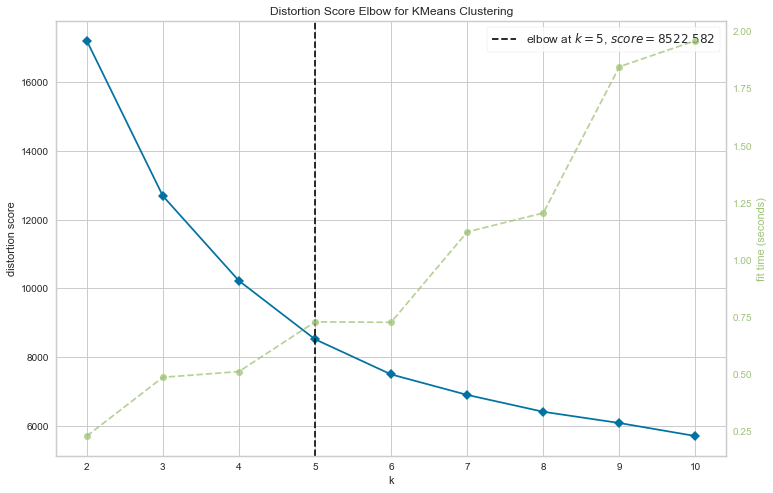

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
# Elbow method
kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("kelbowvisualizer", KElbowVisualizer(KMeans(),K=(4,10)))])
kmeans_visualizer.fit(X_scaled)
kmeans_visualizer.named_steps['kelbowvisualizer'].show()

In [53]:
# KMeans Pipeline with best K
kmeans_model_bis = Pipeline([("preprocessor", MinMaxScaler()),
                             ("kmeans", KMeans(K))])
kmeans_model_bis.fit(X_scaled)

# Kmeans labels
kmeans_labels_bis = kmeans_model_bis.named_steps['kmeans'].labels_

# Scale X
scaler = MinMaxScaler()
X_scaled_bis = scaler.fit_transform(X_scaled)
X_scaled_bis = pd.DataFrame(X_scaled_bis, index=X_scaled.index, columns=X_scaled.columns)
X_scaled_bis["kmeans_label"] = kmeans_labels_bis

# Group by cluster
X_scaled_clusters_bis = X_scaled_bis.groupby("kmeans_label").mean()

# Plot Radar chart
plot_radars(data=X_scaled_clusters_bis,
            group="kmeans_label")

In [54]:
kmeans_model_n = KMeans(n_clusters = 5, random_state = 1).fit(X_scaled_clusters)





In [55]:
kmeans_model_n

KMeans(n_clusters=5, random_state=1)

In [57]:
X_scaleds = X_scaled.drop(['kmeans_label'], axis = 1)
X_scaleds

nb_orders  total_spend  mean_payment_sequential  \
0            0.0     0.009690                      0.0   
1            0.0     0.001289                      0.0   
2            0.0     0.005612                      0.0   
3            0.0     0.002492                      0.0   
4            0.0     0.013717                      0.0   
...          ...          ...                      ...   
93353        0.0     0.150707                      0.0   
93354        0.0     0.005492                      0.0   
93355        0.0     0.007534                      0.0   
93356        0.0     0.009089                      0.0   
93357        0.0     0.004538                      0.0   

       mean_payment_installments  mean_review_score  mean_delivery_days  \
0                       0.307692               1.00            0.023923   
1                       0.038462               0.75            0.009569   
2                       0.307692               0.50            0.119617   
3                       0.153846               0.75            0.090909   
4                       0.230769               1.00            0.057416   
...                          ...                ...                 ...   
93353                   0.384615               1.00            0.129187   
93354                   0.038462               0.75            0.138756   
93355                   0.038462               1.00            0.066986   
93356                   0.192308               1.00            0.052632   
93357                   0.153846               1.00            0.033493   

       favorite_sale_month  total_items  order_mean_delay  freight_ratio  
0                 0.363636     0.000000          0.155680       0.083333  
1                 0.363636     0.000000          0.159888       0.312500  
2                 0.181818     0.000000          0.753156       0.208333  
3                 0.818182     0.000000          0.450210       0.416667  
4                 0.909091     0.000000          0.403927       0.093750  
...                    ...          ...               ...            ...  
93353             0.454545     0.043478          0.626928       0.250000  
93354             1.000000     0.000000          0.367461       0.239583  
93355             0.090909     0.000000          0.796634       0.208333  
93356             0.363636     0.000000          0.166900       0.145833  
93357             0.363636     0.000000          0.678822       0.208333  

[93358 rows x 10 columns]

In [58]:
model = PCA(n_components = 0.95)
X_reduced = model.fit(X_scaleds)

In [59]:
# PCA Pipeline
pca = Pipeline([("preprocessor", MinMaxScaler()),
                ("pca", PCA(svd_solver='full'))])
pca.fit(X_scaleds)
X_projected = pca.transform(X_scaleds)

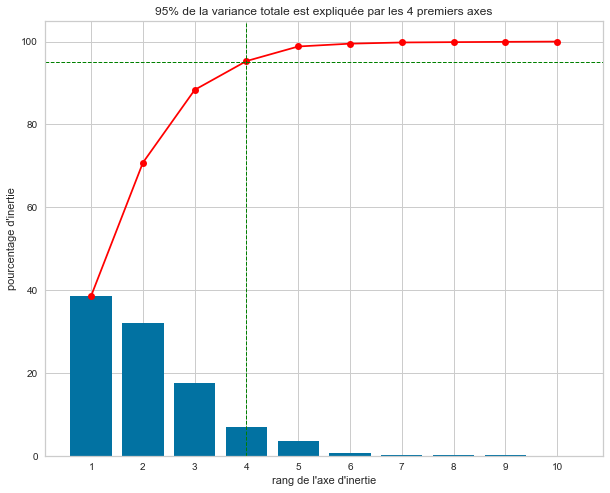

In [60]:
# Explained variance
varexpl = pca.named_steps['pca'].explained_variance_ratio_*100

# Plot of cumulated variance
plt.figure(figsize=(10,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)

cumSumVar = varexpl.cumsum()
plt.plot(np.arange(len(varexpl))+1, cumSumVar,c="red",marker='o')
plt.axhline(y=95, linestyle="--", 
            color="green",
            linewidth=1)

limit = 95
valid_idx = np.where(cumSumVar >= limit)[0]
min_plans = valid_idx[cumSumVar[valid_idx].argmin()]+1
plt.axvline(x=min_plans, linestyle="--", 
            color="green",
            linewidth=1)

plt.xlabel("rang de l'axe d'inertie")
plt.xticks(np.arange(len(varexpl))+1)
plt.ylabel("pourcentage d'inertie")
plt.title("{}% de la variance totale est expliquée"\
          " par les {} premiers axes".format(limit,
                                            min_plans))
plt.show(block=False)

In [61]:
def cerle_corr(pcs, n_comp, pca, axis_ranks, 
               labels=None, label_rotation=0):
    
    fig=plt.figure(figsize=(12,n_comp*5))
    count=1
    for d1, d2 in axis_ranks:
        if d2 < n_comp:
            
            # initialisation de la figure
            #fig.subplots_adjust(left=0.1,right=0.9,bottom=0.1,top=0.9)
            ax=plt.subplot(int(n_comp/2),2,count)
            ax.set_aspect('equal', adjustable='box') 
            
            #détermination des limites du graphique
            ax.set_xlim(-1,1) 
            ax.set_ylim(-1,1) 
            
            #affichage des flèches 
            ax.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                       pcs[d1,:],pcs[d2,:], 
                       angles='xy', scale_units='xy', scale=1, 
                       color="grey", alpha=0.5)
            # et noms de variables
            for i,(x,y) in enumerate(pcs[[d1,d2]].T):
                ax.annotate(labels[i],(x,y),
                             ha='center', va='center',
                             fontsize='14',color="#17aafa", alpha=0.8) 

            #ajouter les axes 
            ax.plot([-1,1],[0,0],linewidth=1, color='grey', ls='--') 
            ax.plot([0,0],[-1,1],linewidth=1, color='grey', ls='--')

            #ajouter un cercle 
            cercle = plt.Circle((0,0),1,color='#17aafa',fill=False) 
            ax.add_artist(cercle) 

            # nom des axes, avec le pourcentage d'inertie expliqué
            ax.set_xlabel('F{} ({}%)'.format(d1+1, 
                                          round(100*pca.explained_variance_ratio_[d1],1)))
            ax.set_ylabel('F{} ({}%)'.format(d2+1, 
                                          round(100*pca.explained_variance_ratio_[d2],1)))

            ax.set_title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            count+=1
            
    plt.suptitle("Cercles des corrélations sur les {} premiers axes".format(n_comp),
                 y=.9, color="blue", fontsize=18)        
    plt.show(block=False)

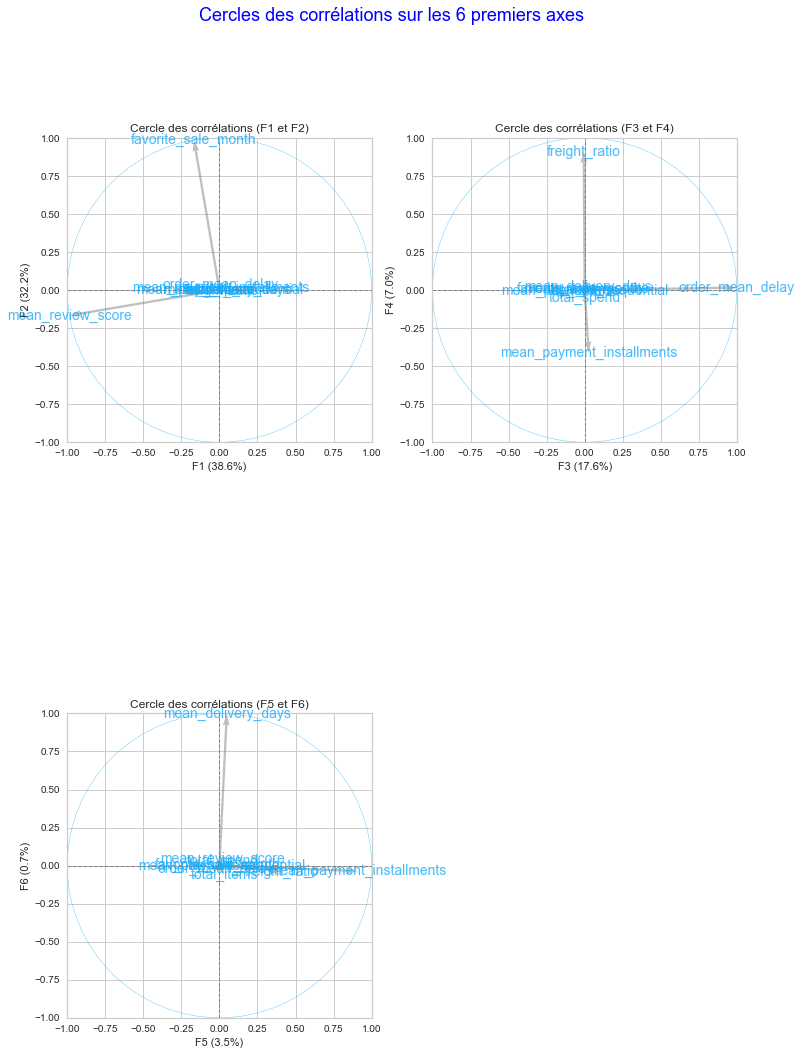

In [62]:

# Principal component space
pcs = pca.named_steps['pca'].components_

# Plot correlation circle
cerle_corr(pcs,
           6,
           pca.named_steps['pca'],
           [(0,1),(2,3),(4,5)],
           labels = np.array(X_scaleds.columns))

In [63]:
# KMeans Pipeline with best K for PCA results
kmeans_model_pca = Pipeline([("preprocessor", MinMaxScaler()),
                             ("kmeans", KMeans(K))])
kmeans_model_pca.fit(X_projected[:,:4])

# Kmeans labels
pca_kmeans_labels = kmeans_model_pca.named_steps['kmeans'].labels_
X_scaled_bis["kmeans_label_pca"] = pca_kmeans_labels
X_scaled_clusters_pca = X_scaled_bis.groupby("kmeans_label_pca").mean()
X_scaled_clusters_pca.iloc[:,:-1]

nb_orders  total_spend  mean_payment_sequential  \
kmeans_label_pca                                                    
0                  0.000000     0.010870                 0.002376   
1                  0.002686     0.010785                 0.001594   
2                  0.001875     0.013415                 0.001886   
3                  0.000705     0.010825                 0.001716   
4                  0.005406     0.011796                 0.001478   

                  mean_payment_installments  mean_review_score  \
kmeans_label_pca                                                 
0                                  0.122871           0.892456   
1                                  0.104815           0.887961   
2                                  0.123970           0.062388   
3                                  0.116342           0.894044   
4                                  0.110223           0.905765   

                  mean_delivery_days  favorite_sale_month  total_items  \
kmeans_label_pca                                                         
0                           0.052205             0.347671     0.004930   
1                           0.056187             0.136168     0.006703   
2                           0.091840             0.437829     0.015241   
3                           0.053818             0.837022     0.005544   
4                           0.038551             0.504222     0.009103   

                  order_mean_delay  freight_ratio  
kmeans_label_pca                                   
0                         0.673512       0.218938  
1                         0.247324       0.214398  
2                         0.324342       0.222188  
3                         0.433159       0.211550  
4                         0.083340       0.219768

In [64]:
X_scaled_clusters_pca.head(7)

nb_orders  total_spend  mean_payment_sequential  \
kmeans_label_pca                                                    
0                  0.000000     0.010870                 0.002376   
1                  0.002686     0.010785                 0.001594   
2                  0.001875     0.013415                 0.001886   
3                  0.000705     0.010825                 0.001716   
4                  0.005406     0.011796                 0.001478   

                  mean_payment_installments  mean_review_score  \
kmeans_label_pca                                                 
0                                  0.122871           0.892456   
1                                  0.104815           0.887961   
2                                  0.123970           0.062388   
3                                  0.116342           0.894044   
4                                  0.110223           0.905765   

                  mean_delivery_days  favorite_sale_month  total_items  \
kmeans_label_pca                                                         
0                           0.052205             0.347671     0.004930   
1                           0.056187             0.136168     0.006703   
2                           0.091840             0.437829     0.015241   
3                           0.053818             0.837022     0.005544   
4                           0.038551             0.504222     0.009103   

                  order_mean_delay  freight_ratio  kmeans_label  
kmeans_label_pca                                                 
0                         0.673512       0.218938      2.955660  
1                         0.247324       0.214398      3.998744  
2                         0.324342       0.222188      1.000000  
3                         0.433159       0.211550      0.000286  
4                         0.083340       0.219768      1.990518

In [65]:
plot_radars(data=X_scaled_clusters_pca.iloc[:,:-1],
            group="kmeans_label_pca")

In [66]:
kmeans_model_n = KMeans(n_clusters = 5, random_state = 1).fit(X_scaled_clusters_pca.iloc[:,:-1])

X_scaled_clusters_pca['kmean'] = kmeans_model_n.labels_

X_scaled_clusters_pca['kmean'].value_counts()

2    1
4    1
1    1
0    1
3    1
Name: kmean, dtype: int64

In [67]:
labels = pca_kmeans_labels
pca_data = X_projected[:,:4]

In [68]:
def bench_k_means(model, name, data, labels):
    t0 = time()
    estimator = make_pipeline(MinMaxScaler(), model).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[1].inertia_]
    
    # Test differents metrics on pred labels
    clustering_metrics = [
        homogeneity_score,
        adjusted_rand_score,
        adjusted_mutual_info_score]
    results += [m(labels, estimator[1].labels_) for m in clustering_metrics]
    
    # Show the results
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

In [69]:
print("Scores de stabilité à l'initialisation")
print(53 * '_')
print('Iteration\tFitTime\tInertia\tHomo\tARI\tAMI')
print(53 * '_')

for i in range(10):
    imodel = KMeans(n_clusters=K, n_init=1, init="k-means++")
    bench_k_means(model = imodel, name="Iter "+str(i), 
                  data=pca_data, labels=labels)

print(53 * '_')

Scores de stabilité à l'initialisation
_____________________________________________________
Iteration	FitTime	Inertia	Homo	ARI	AMI
_____________________________________________________
Iter 0   	0.095s	5341	1.000	1.000	1.000
Iter 1   	0.076s	5922	0.682	0.605	0.715
Iter 2   	0.069s	5341	1.000	1.000	1.000
Iter 3   	0.084s	5904	0.686	0.605	0.720
Iter 4   	0.073s	5341	1.000	1.000	1.000
Iter 5   	0.104s	6066	0.607	0.556	0.621
Iter 6   	0.095s	5341	1.000	1.000	1.000
Iter 7   	0.070s	5341	1.000	1.000	1.000
Iter 8   	0.070s	6454	0.667	0.563	0.682
Iter 9   	0.074s	5341	1.000	1.000	1.000
_____________________________________________________


In [70]:
from sklearn.preprocessing import normalize

# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
  

  


In [71]:
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [72]:
# Explained variance
pca = PCA()
pca.fit(X_normalized)

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[0.20570958 0.17095015 0.16791661 0.14234982 0.10226304 0.07692536
 0.05423556 0.0255545  0.0201317  0.01849994]
[0.20894058 0.1736352  0.17055401 0.14458565 0.10386925 0.07813359
 0.05508742 0.02595588 0.0204479  0.01879051]


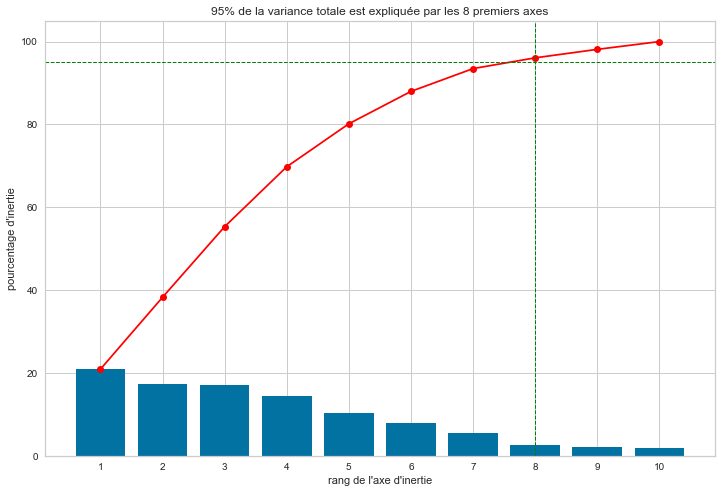

In [73]:
# Explained variance
pca = PCA()
pca.fit(X_normalized)
varexpl = pca.explained_variance_ratio_*100

# Plot of cumulated variance
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)

cumSumVar = varexpl.cumsum()
plt.plot(np.arange(len(varexpl))+1, cumSumVar,c="red",marker='o')
plt.axhline(y=95, linestyle="--", 
            color="green",
            linewidth=1)

limit = 95
valid_idx = np.where(cumSumVar >= limit)[0]
min_plans = valid_idx[cumSumVar[valid_idx].argmin()]+1
plt.axvline(x=min_plans, linestyle="--", 
            color="green",
            linewidth=1)

plt.xlabel("rang de l'axe d'inertie")
plt.xticks(np.arange(len(varexpl))+1)
plt.ylabel("pourcentage d'inertie")
plt.title("{}% de la variance totale est expliquée"\
          " par les {} premiers axes".format(limit,
                                            min_plans))
plt.show(block=False)

In [74]:
# 4 : Réduire la dimensionnalité des Données

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

In [75]:
import numpy as np
from sklearn.model_selection import train_test_split

In [76]:
 y_train, y_test  = train_test_split(
                     X_principal,  test_size=0.2, random_state=0)

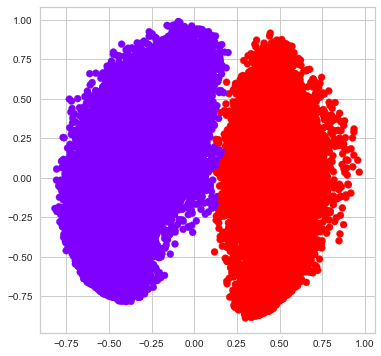

In [77]:
# Step 6: Building and Visualizing the different clustering models for different values of k
# k = 2
from sklearn.cluster import AgglomerativeClustering
ac2 = AgglomerativeClustering(n_clusters = 2)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(y_test['P1'], y_test['P2'],
            c = ac2.fit_predict(y_test), cmap ='rainbow')
plt.show()

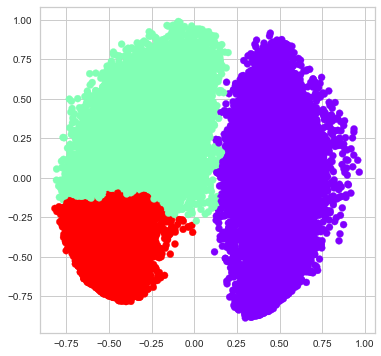

In [78]:
# k = 3

ac3 = AgglomerativeClustering(n_clusters = 3)
  
plt.figure(figsize =(6, 6))
plt.scatter(y_test['P1'], y_test['P2'],
            c = ac3.fit_predict(y_test), cmap ='rainbow')
plt.show()

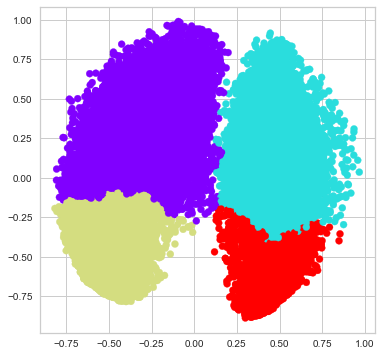

In [79]:
# k = 4

ac4 = AgglomerativeClustering(n_clusters = 4)
  
plt.figure(figsize =(6, 6))
plt.scatter(y_test['P1'], y_test['P2'],
            c = ac4.fit_predict(y_test), cmap ='rainbow')
plt.show()

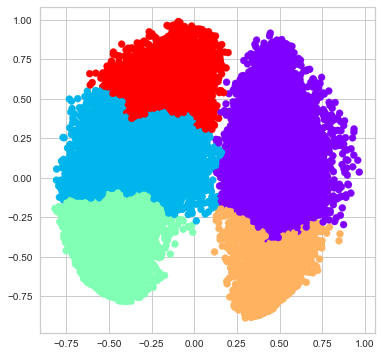

In [80]:
# k = 5

ac5 = AgglomerativeClustering(n_clusters = 5)
  
plt.figure(figsize =(6, 6))
plt.scatter(y_test['P1'], y_test['P2'],
            c = ac5.fit_predict(y_test), cmap ='rainbow')
plt.show()

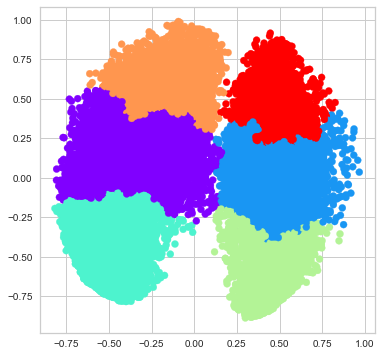

In [81]:
# k = 6

ac6 = AgglomerativeClustering(n_clusters = 6)
  
plt.figure(figsize =(6, 6))
plt.scatter(y_test['P1'], y_test['P2'],
            c = ac6.fit_predict(y_test), cmap ='rainbow')
plt.show()

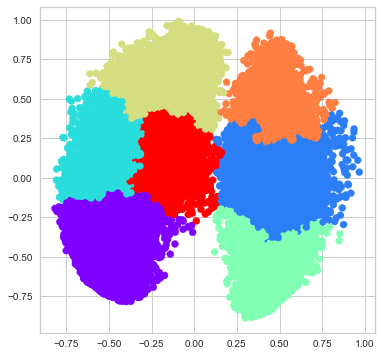

In [82]:
# k = 7

ac7 = AgglomerativeClustering(n_clusters = 7)
  
plt.figure(figsize =(6, 6))
plt.scatter(y_test['P1'], y_test['P2'],
            c = ac7.fit_predict(y_test), cmap ='rainbow')
plt.show()

In [83]:
# Step 7: Evaluating the different models and Visualizing the results.
from sklearn.metrics import silhouette_score
# Appending the silhouette scores of the different models to the list
silhouette_scores = []



In [84]:
silhouette_scores.append(
        silhouette_score(y_test, ac2.fit_predict(y_test)))
silhouette_scores.append(
        silhouette_score(y_test, ac3.fit_predict(y_test)))
silhouette_scores.append(
        silhouette_score(y_test, ac4.fit_predict(y_test)))
silhouette_scores.append(
        silhouette_score(y_test, ac5.fit_predict(y_test)))
silhouette_scores.append(
        silhouette_score(y_test, ac6.fit_predict(y_test)))
silhouette_scores.append(
        silhouette_score(y_test, ac7.fit_predict(y_test)))

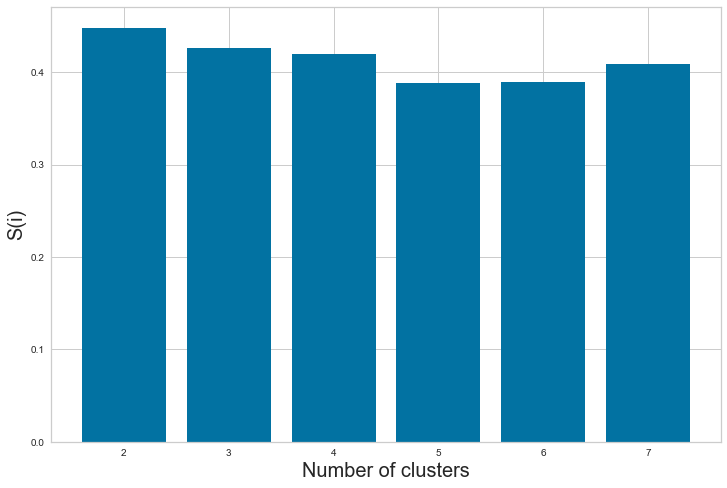

In [85]:
# Plotting a bar graph to compare the results
k = [2, 3, 4, 5, 6, 7]
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

In [86]:
Xbis_train,Xbis_test   = train_test_split(
                     X_normalized,  test_size=0.8, random_state=0)

In [87]:
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.025, min_samples = 5).fit(X_principal)
labels = db_default.labels_

In [88]:
from scipy.cluster.hierarchy import linkage,dendrogram
Z = linkage(Xbis_train,method='ward',metric='euclidean')


In [89]:
from scipy.cluster.hierarchy import ward, fcluster

#découpage à la hauteur t = 38==> identifiants de 6 groupes obtenus
groupes_cah = fcluster(Z,t=38,criterion='distance')

#index triés des groupes
idg = np.argsort(groupes_cah)


In [90]:
Xbis_train = pd.DataFrame(Xbis_train, index=Xbis_train.index, columns=Xbis_train.columns)
Xbis_train_clusters = Xbis_train.mean()
Xbis_train_clusters

0   -0.044305
1   -0.050692
2   -0.030749
3   -0.046651
4    0.050821
5   -0.041920
6    0.003964
7   -0.055909
8   -0.016337
9   -0.013382
dtype: float64

In [91]:
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.025, min_samples = 5).fit(X_principal)
labels = db_default.labels_

In [92]:
np.unique(labels)

array([-1,  0,  1,  2], dtype=int64)

In [93]:
# Step 5: Building the clustering model
from sklearn import metrics
labels_true = X.index
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.025, min_samples = 5).fit(X_principal)
core_samples_mask = np.zeros_like(db_default.labels_, dtype=bool)
core_samples_mask[db_default.core_sample_indices_] = True
labels = db_default.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.4f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.4f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.4f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.4f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.4f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.4f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Estimated number of noise points: 103
Homogeneity: 0.0008
Completeness: 1.0000
V-measure: 0.0017
Adjusted Rand Index: 0.0000
Adjusted Mutual Information: -0.0000
Silhouette Coefficient: -0.2538


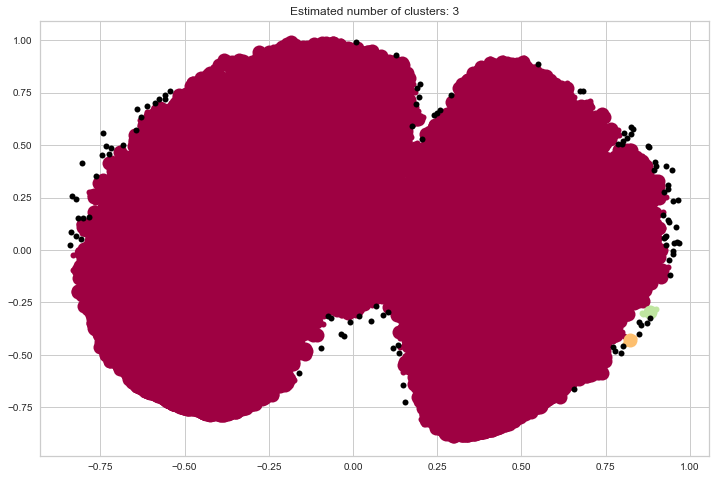

In [94]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_principal[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
                          markeredgecolor='k', markersize=14)

    xy = X_principal[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [95]:
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.405, min_samples = 5).fit(X_normalized)
labels = db_default.labels_

In [96]:
np.unique(labels)

array([-1,  0], dtype=int64)

In [97]:
# Step 5: Building the clustering model
from sklearn import metrics
labels_true = X.index
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.405, min_samples = 5).fit(X_normalized)
core_samples_mask = np.zeros_like(db_default.labels_, dtype=bool)
core_samples_mask[db_default.core_sample_indices_] = True
labels = db_default.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.4f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.4f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.4f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.4f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.4f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.4f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 1
Estimated number of noise points: 66
Homogeneity: 0.0005
Completeness: 1.0000
V-measure: 0.0010
Adjusted Rand Index: 0.0000
Adjusted Mutual Information: -0.0000
Silhouette Coefficient: 0.3323


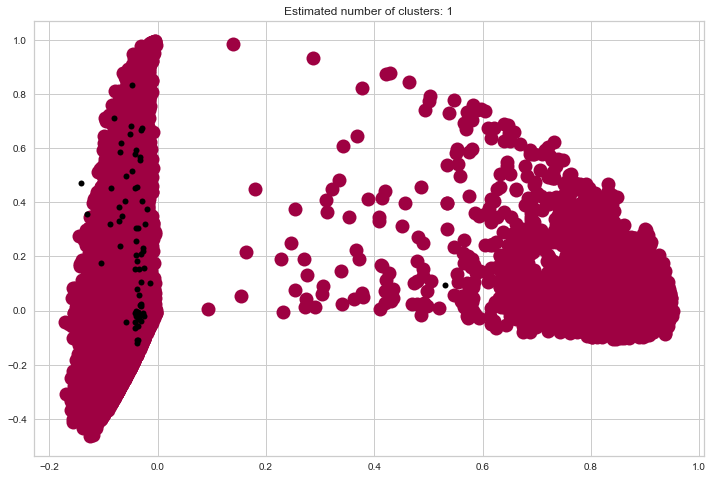

In [98]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_normalized[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
                          markeredgecolor='k', markersize=14)

    xy = X_normalized[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [99]:
data.to_csv("cleanedolist-customers-segmentation-evo-ct.csv")